In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

In [2]:
ProjectData=pd.read_csv('3clean_hotel_data.csv')
ProjectData.head()
#feature1=['hotel','customer_type','meal','reserved_room_type','assigned_room_type','deposit_type','adr','required_car_parking_spaces']
#AssignmentData=ProjectData[feature1] #set a new dataset that only contains the data we want to explore
#AssignmentData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,2,0.0,0,0,15
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,2,0.0,0,0,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,2,75.0,0,0,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,2,75.0,0,0,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,2,98.0,0,1,76


In [3]:
X=ProjectData.drop('is_canceled',axis=1)
y=ProjectData['is_canceled']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y),test_size=0.3,random_state=0)  

------------------------Linear SVM------------------------------
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     22347
           1       0.87      0.48      0.61     13470

    accuracy                           0.78     35817
   macro avg       0.81      0.72      0.73     35817
weighted avg       0.80      0.78      0.76     35817

------------------------RBF SVM-------------------------------
              precision    recall  f1-score   support

           0       0.66      0.95      0.78     22347
           1       0.69      0.17      0.28     13470

    accuracy                           0.66     35817
   macro avg       0.67      0.56      0.53     35817
weighted avg       0.67      0.66      0.59     35817



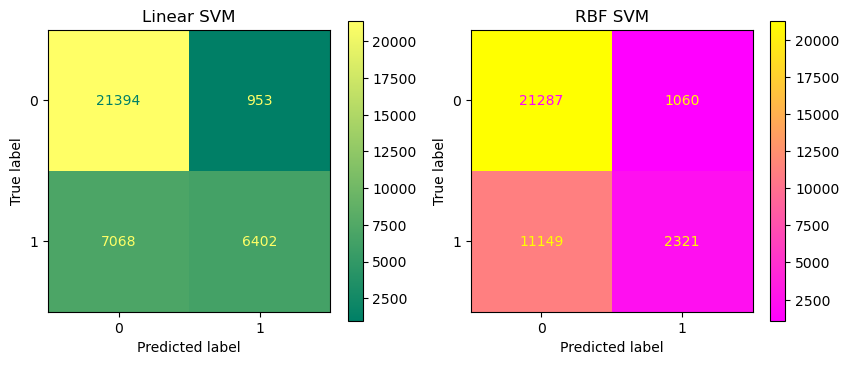

In [5]:
from sklearn.svm import SVC
clf6 = SVC(kernel='linear', random_state=0)
clf6.fit(X_train, y_train)
Y_predTrain6 = clf6.predict(X_train)
Y_predTest6= clf6.predict(X_test)

#because the model has random sampling, a random seed can ensure repeated results.
clf7 = SVC(kernel='rbf', random_state=0)
clf7.fit(X_train, y_train)
Y_predTrain7 = clf7.predict(X_train)
Y_predTest7 = clf7.predict(X_test)

fig, axs = plt.subplots(ncols=2, figsize=(10, 3.9))

ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest6, labels=clf6.classes_, cmap= plt.cm.summer, ax=axs[0])
rfm = ConfusionMatrixDisplay.from_predictions(y_test, Y_predTest7, labels=clf7.classes_, cmap= plt.cm.spring, ax=axs[1])
axs[0].set_title("Linear SVM")
axs[1].set_title("RBF SVM")

print("------------------------Linear SVM------------------------------")
print(classification_report(y_test, Y_predTest6))
print("------------------------RBF SVM-------------------------------")
print(classification_report(y_test, Y_predTest7))

In [6]:
scores = cross_val_score(clf6, X, y, cv=5)
print('Linear SVM Score:', scores)
scores = cross_val_score(clf7, X, y, cv=5)
print('RBF SVM Score:', scores)

Linear SVM Score: [0.67962141 0.55628612 0.71626602 0.71876701 0.55961804]
RBF SVM Score: [0.63506156 0.62304213 0.67895134 0.615739   0.71256858]
